<a href="https://colab.research.google.com/github/howcanigetyourmind/deeplearning-koreauniversty/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto Encoder Example.

본 문서는 TensorFlow 를 사용하여 Deep Learning을 구현하기 위한 기초적인 실습 자료이다.

* Using an auto encoder on MNIST handwritten digits.
* References:
```
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based
    learning applied to document recognition." Proceedings of the IEEE,
    86(11):2278-2324, November 1998.
```    
* Links:
    - [MNIST Dataset] http://yann.lecun.com/exdb/mnist/

* The code and comments are written by by NamJungGu <nowage@gmail.com> 

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.    

In [0]:
%matplotlib inline

#from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('TkAgg')


In [7]:
# # Import MNIST data
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data", one_hot=True)


from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./MNIST_data', one_hot=True)
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


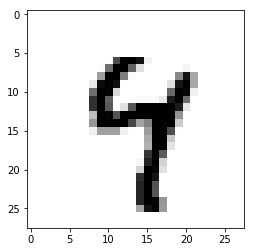

In [8]:
#dir(mnist)
#dir(mnist.train)
#dir(train_labes)
#print(train_labels.__class__)
#print(train_labels.shape)
#print(train_labels[0])
#print(train_labels[1])
#print(train_data[0].reshape([28,28]))
img=train_data[2].reshape([28,28])
import matplotlib.pyplot as plt
 
plt.imshow(img, cmap='Greys')
plt.show()


In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 60
batch_size = 256
display_step = 1
examples_to_show = 10

In [0]:
# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

In [0]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

In [0]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

In [0]:
# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [0]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [0]:
# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [0]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0001 cost= 0.198798493
Epoch: 0002 cost= 0.156265378
Epoch: 0003 cost= 0.142789394
Epoch: 0004 cost= 0.132892206
Epoch: 0005 cost= 0.117954798
Epoch: 0006 cost= 0.119127870
Epoch: 0007 cost= 0.115764819
Epoch: 0008 cost= 0.110322669
Epoch: 0009 cost= 0.106329508
Epoch: 0010 cost= 0.107395299
Epoch: 0011 cost= 0.105718158
Epoch: 0012 cost= 0.103147767
Epoch: 0013 cost= 0.098322049
Epoch: 0014 cost= 0.098544821
Epoch: 0015 cost= 0.097968921
Epoch: 0016 cost= 0.096187532
Epoch: 0017 cost= 0.094183594
Epoch: 0018 cost= 0.090972766
Epoch: 0019 cost= 0.092637412
Epoch: 0020 cost= 0.087325171
Epoch: 0021 cost= 0.083093934
Epoch: 0022 cost= 0.078531072
Epoch: 0023 cost= 0.080822013
Epoch: 0024 cost= 0.079101764
Epoch: 0025 cost= 0.076844789
Epoch: 0026 cost= 0.077061936
Epoch: 0027 cost= 0.076900445
Epoch: 0028 cost= 0.076919049
Epoch: 0029 cost= 0.073501915
Epoch: 0030 cost= 0.073829934
Epoch: 0031 cost= 0.073715843
Epoch: 0032 cost= 0.073133305
Epoch: 0033 cost= 0.073959857
Epoch: 003

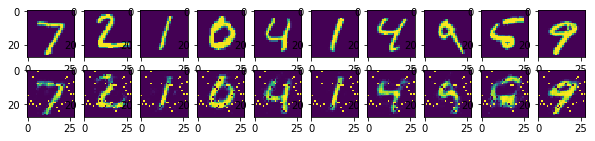

In [26]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
        # Applying encode and decode over test set
    encode_decode = sess.run(
        y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))


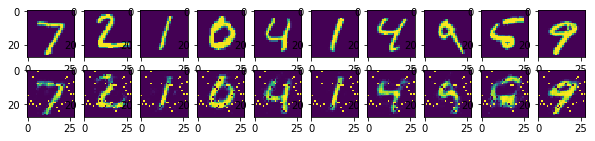

In [27]:

f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
